In [97]:
#Importing Basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [98]:
#Importing File

df = pd.read_excel('Online Retail.xlsx')

In [99]:
#Checking Overview of the Data

print(df.shape)
print(df.dtypes)
df.head()

(541909, 8)
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [100]:
#Checking for Missing Values

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [101]:
import plotly.express as px

# Calculate the number of orders per country
orders_per_country = df['Country'].value_counts().reset_index()
orders_per_country.columns = ['Country', 'Number of Orders']

# Create a choropleth map
fig = px.choropleth(orders_per_country, 
                    locations='Country', 
                    locationmode='country names', 
                    color='Number of Orders', 
                    color_continuous_scale='Blues',
                    title='Number of Orders per Country')

# Display the map
fig.show()

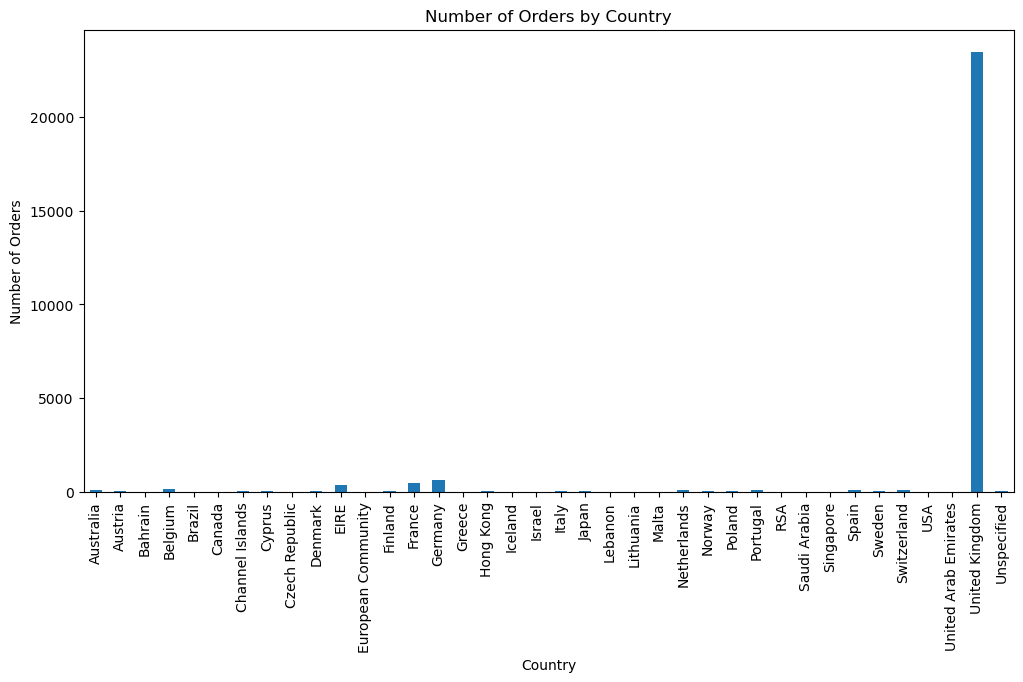

In [102]:
# Count the number of orders by country
orders_per_country = df.groupby('Country')['InvoiceNo'].nunique()

# Plot the number of orders by country
plt.figure(figsize=(12, 6))
orders_per_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Country')
plt.show()

In [103]:
#Drop Missing Data on CustomerID

df.dropna(subset=['CustomerID'], inplace=True)

In [104]:
#Converting Invoice Date column to Date Time Data Type

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Cohort Analysis

In [105]:
#Finding the Aquisition Month Cohort

def get_month(n): return dt.datetime(n.year, n.month, 1)

df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
cust_month = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = cust_month.transform('min')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [106]:
#Extracting values from data

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [107]:
#Creating Cohort Index

invoice_year, invoice_month, _ = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df['CohortIndex'] = years_diff * 12 + months_diff + 1

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


There is a 1 on the CohortIndex to signify the first month instead of the number 0.

In [108]:
#Creating Cohort Counts Table based on CustomerID

month_ind = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = month_ind['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [109]:
#Calculting the Retention Rate

cohort_sizes = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_sizes, axis=0)

In [110]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


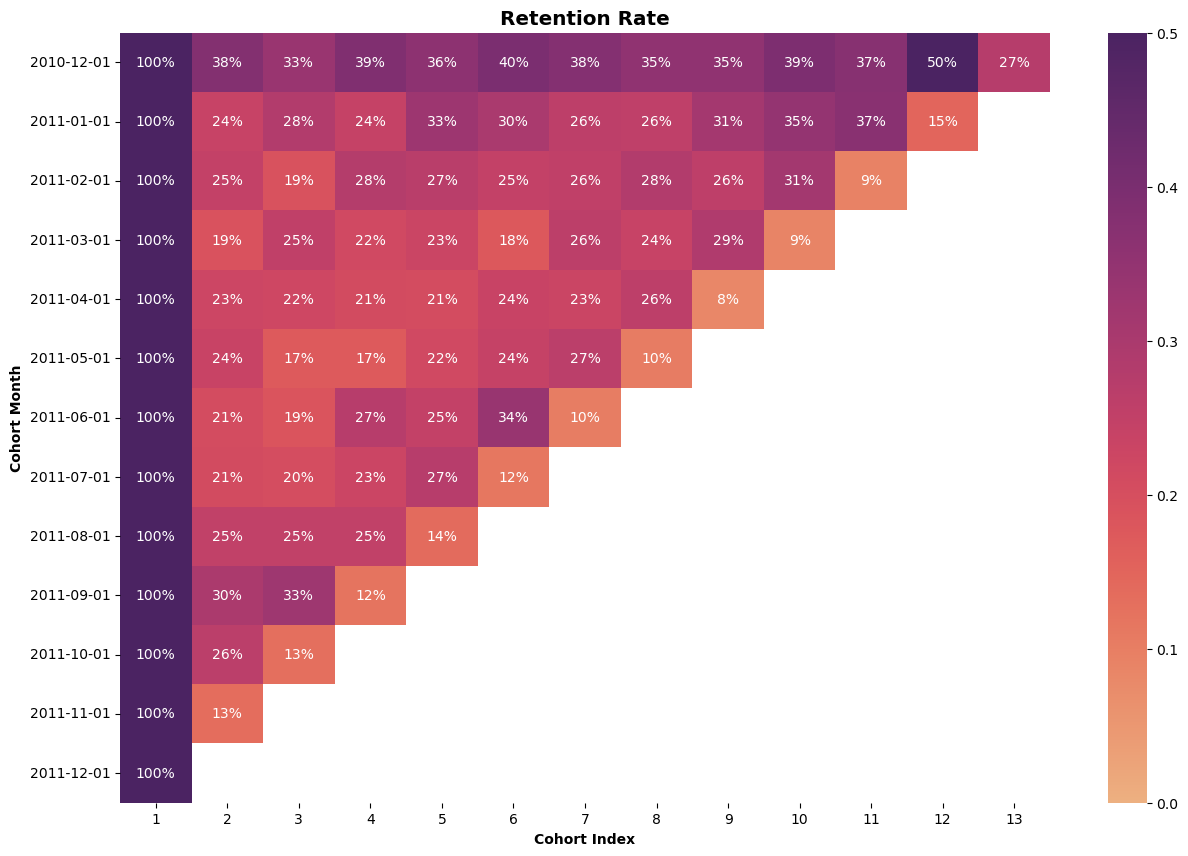

In [111]:
#Retention Rate Heatmap

plt.figure(figsize=(15,10))

ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin= 0.0, vmax=0.5, cmap='flare')

ticklabels = [retention.index[int(tick)].strftime('%Y-%m-%d') for tick in ax.get_yticks()]

ax.set_yticklabels(ticklabels)

ax.set_title('Retention Rate', fontsize='x-large', fontweight='heavy')

ax.set_ylabel('Cohort Month', fontweight='bold')
ax.set_xlabel('Cohort Index', fontweight='bold')

plt.show()

# Recency, Frequency, Monetary Value (RFM)

In [112]:
#Creating A new column of the sum of the transaction of the customer

df['TotalSum'] = df['Quantity'] * df['UnitPrice']

In [113]:
#Finding Out the oldest date and the newset date in the Dataset

print('Oldest Date: ', min(df.InvoiceDate))
print('Most Recent Date: ', max(df.InvoiceDate))

Oldest Date:  2010-12-01 08:26:00
Most Recent Date:  2011-12-09 12:50:00


In [114]:
# Creating new Current Date

from datetime import timedelta

new_current = max(df.InvoiceDate) + dt.timedelta(days=1)

print('Most Recent Date: ', max(df.InvoiceDate))
print('New Recent Date: ', new_current)

Most Recent Date:  2011-12-09 12:50:00
New Recent Date:  2011-12-10 12:50:00


In [115]:
#Creating RFM values

rfm_metric = df.groupby(['CustomerID']).agg({'InvoiceDate' : lambda x: (new_current - x.max()).days, 
                                            'InvoiceNo' : 'count',
                                            'TotalSum' : 'sum'})

rfm_metric.head()

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [116]:
#Renaming Column Names

rfm_metric = rfm_metric.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSum':'MonetaryValue'})

rfm_metric.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


1. **Recency** are the days since the customer's last transaction. (Taken from the New Current Date and the Latest transaction from the customer)

2. **Frequency** is the number of transaction in the past 12 months.

3. **Monetary Value** is how much the customer spent in the past 12 months. 

In [117]:
#Creating Recency score based on quartile

r_labels = range(4, 0, -1)

r_quartiles = pd.qcut(rfm_metric['Recency'], 4, labels=r_labels)

rfm_metric = rfm_metric.assign(R = r_quartiles.values).astype('int64')



In [118]:
#Creating Frequency score and Monetary Value Score based on quartile

f_labels = range(1,5)
m_labels = range(1,5)

f_quartiles = pd.qcut(rfm_metric['Frequency'], 4, labels=f_labels)
m_quartiles = pd.qcut(rfm_metric['MonetaryValue'], 4, labels=m_labels)

rfm_metric = rfm_metric.assign(F = f_quartiles.values).astype('int64')
rfm_metric = rfm_metric.assign(M = m_quartiles.values).astype('int64')



In [119]:
#Creating Column with total of RFM score

def join_rfm(n): return str(n['R']) + str(n['F']) + str(n['M'])

rfm_metric['RFM_Segment'] = rfm_metric.apply(join_rfm, axis=1)
rfm_metric['RFM_Score'] = rfm_metric[['R', 'F', 'M']].sum(axis=1)



In [120]:
#Summarizing the Metrics by RFM score

by_rfm_score = rfm_metric.groupby('RFM_Score').agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue':['mean', 'count']}).round(1)

by_rfm_score

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           264.8       7.8         108.7   392
4           174.4      13.9         226.8   392
5           153.1      21.2         346.4   516
6            94.3      28.5         491.3   468
7            78.8      39.7         723.7   447
8            62.7      57.0         974.2   467
9            44.2      79.0        1369.1   411
10           31.3     115.3        1893.6   440
11           20.5     193.9        3845.2   368
12            6.7     371.8        8850.3   471

# K-Means Clustering

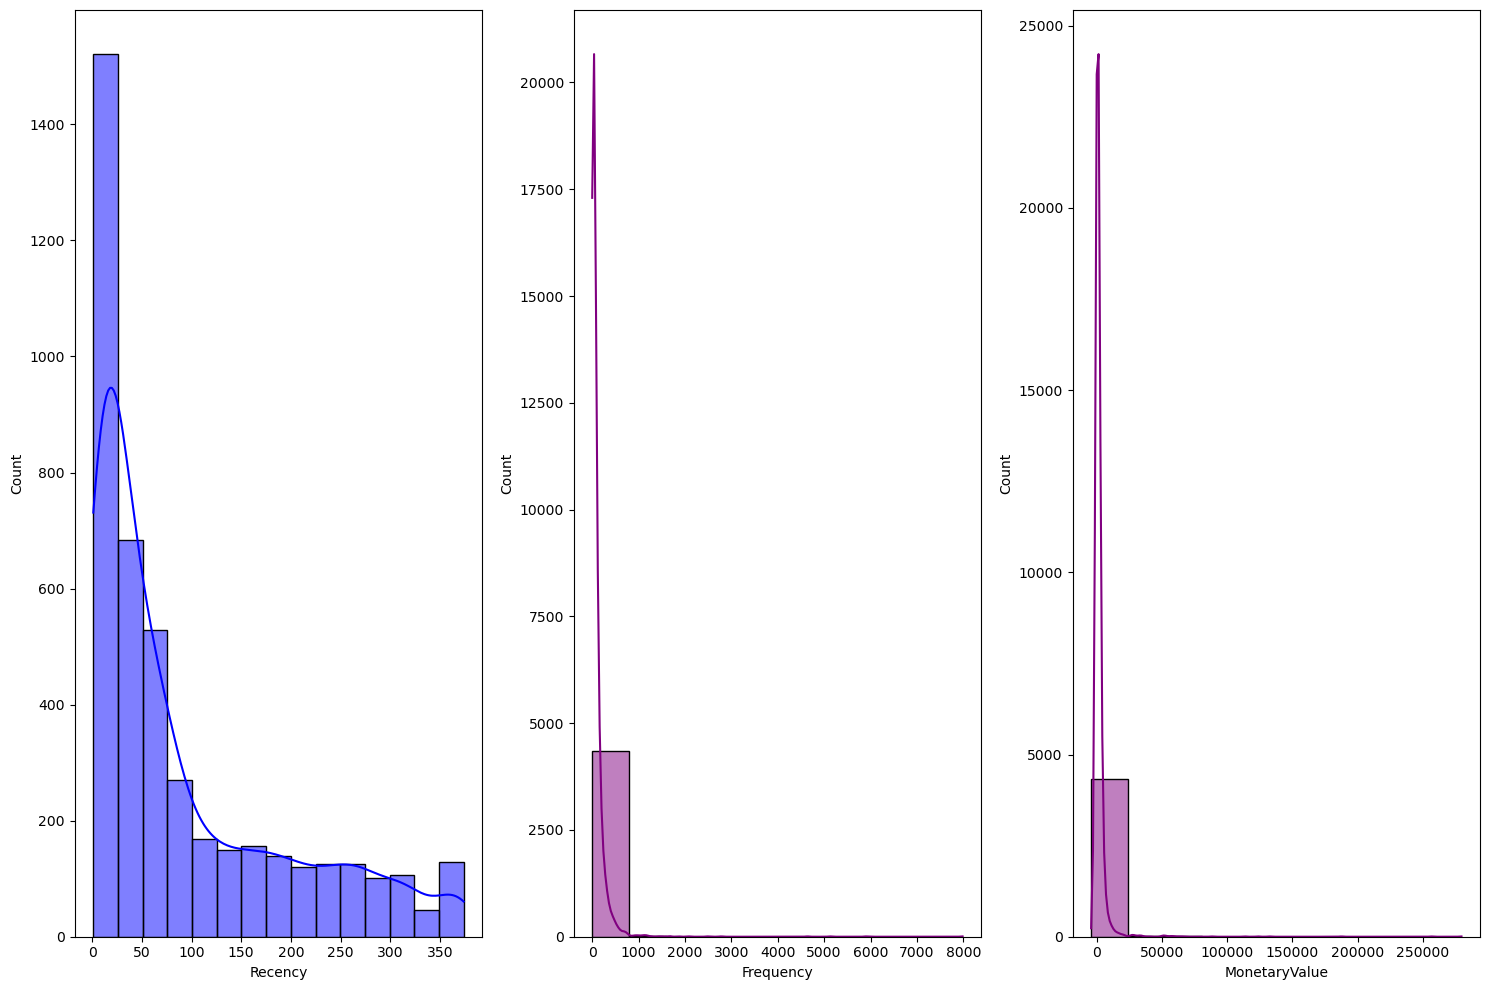

In [121]:
#Checking the distribution of the RFM features

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

sns.histplot(ax=ax[0], data=rfm_metric, x='Recency', bins=15, kde=True, color='blue')
sns.histplot(ax=ax[1], data=rfm_metric, x='Frequency', bins=10, kde=True, color='purple')
sns.histplot(ax=ax[2], data=rfm_metric, x='MonetaryValue', bins=10, kde=True, color='purple')

plt.tight_layout()

plt.show()

As we can see, the data is skewed. To fix this we will apply a log tansformation to all of the RFM Metrics to get it closer to a normal distribution. 

In [122]:
rfm_metric_clust = rfm_metric[['Recency', 'Frequency', 'MonetaryValue']]

In [123]:
rfm_metric_clust.query("MonetaryValue == 0")

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0
12454.0,53,30,0
12558.0,2,22,0
12607.0,58,202,0
13256.0,14,1,0
13364.0,67,20,0
13762.0,204,14,0
14557.0,64,32,0
14792.0,64,4,0


In [124]:
rfm_metric_clust['MonetaryValue'] = rfm_metric_clust['MonetaryValue'].replace(0, 1)

C:\Users\radow\AppData\Local\Temp\ipykernel_6680\3624593230.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



To solve the problem of having negative infinity or infinity numbers in the log transformation, I decided to replace all values of 0 into 1. 

In [125]:
rfm_metric_clust 

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,1
12347.0,2,182,4310
12348.0,75,31,1797
12349.0,19,73,1757
12350.0,310,17,334
...,...,...,...
18280.0,278,10,180
18281.0,181,7,80
18282.0,8,13,176


In [126]:
rfm_metric_clust_log = np.log(rfm_metric_clust)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

invalid value encountered in log



In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_metric_scaled = scaler.fit_transform(rfm_metric_clust_log)

In [128]:
rfm_metric_scaled = np.nan_to_num(rfm_metric_scaled)

In [129]:
from sklearn.cluster import KMeans

sse = {}

for n in range(1, 13):
    kmeans = KMeans(n_clusters=n, random_state=21)
    kmeans.fit(rfm_metric_scaled)
    sse[n] = kmeans.inertia_

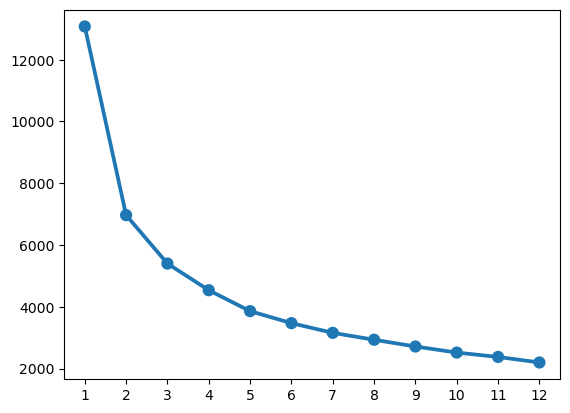

In [130]:
#Using Elbow Method to find the best n value

sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

plt.show()

In [131]:
#Kmeans with 3 Clusters

kmeans = KMeans(n_clusters = 3, random_state = 21)
kmeans.fit(rfm_metric_scaled)
cluster_labels = kmeans.labels_

In [139]:

from sklearn.metrics import silhouette_score



# Calculate silhouette score
silhouette_avg = silhouette_score(rfm_metric_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.39180050605549355


In [132]:
#Grouping into the 3 Segments

rfm_metric_k3 = rfm_metric.assign(Cluster = cluster_labels)

rfm_metric_k3.groupby(['Cluster']).agg({'Recency': 'mean', 'Frequency':'mean', 'MonetaryValue':['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         173.0      15.0         264.0  1532
1          67.0      67.0        1059.0  1857
2          12.0     264.0        6029.0   983

In [133]:
#Transforming scaled data to a DataFrame & Adding Column

rfm_metric_scaled = pd.DataFrame(rfm_metric_scaled, index=rfm_metric_clust.index, columns=rfm_metric_clust.columns)

rfm_metric_scaled['3_Cluster'] = rfm_metric_k3['Cluster'] 


rfm_metric_scaled

,Recency,Frequency,MonetaryValue,3_Cluster
CustomerID,,,,
12346.0,1.402917,-2.230272,-5.030353,0
12347.0,-2.075135,1.133419,1.399522,2
12348.0,0.399593,-0.186462,0.727377,1
12349.0,-0.537936,0.452198,0.710081,1
12350.0,1.368554,-0.634452,-0.565509,0
...,...,...,...,...
18280.0,1.294161,-1.030135,-1.040475,0
18281.0,1.001152,-1.296103,-1.663533,0
18282.0,-1.128562,-0.834493,-1.057741,0


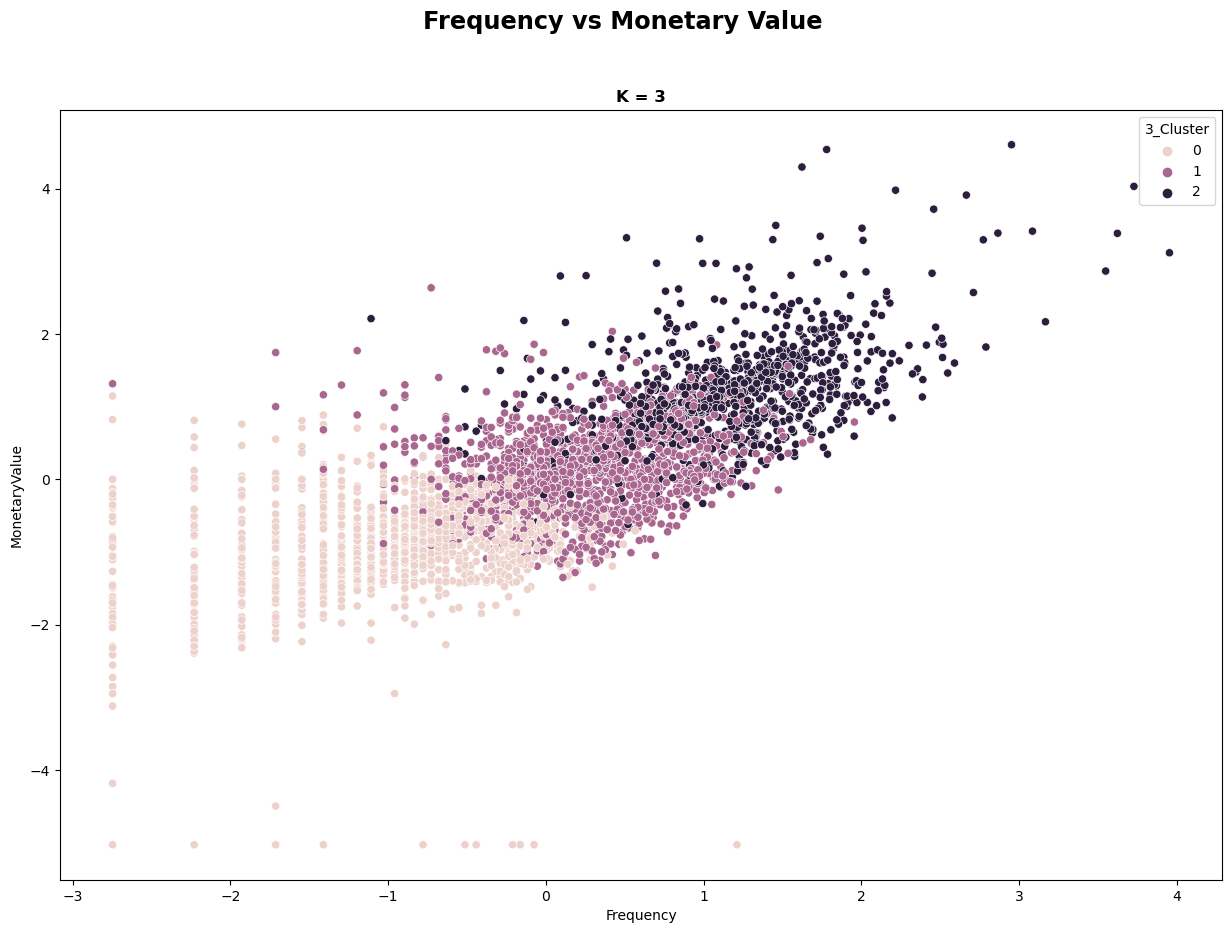

In [134]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Frequency vs Monetary Value', fontweight='heavy', size='xx-large')

sns.scatterplot(ax=ax, x='Frequency', y='MonetaryValue', hue='3_Cluster', data=rfm_metric_scaled)

ax.set_title('K = 3', fontweight='bold')

plt.show()

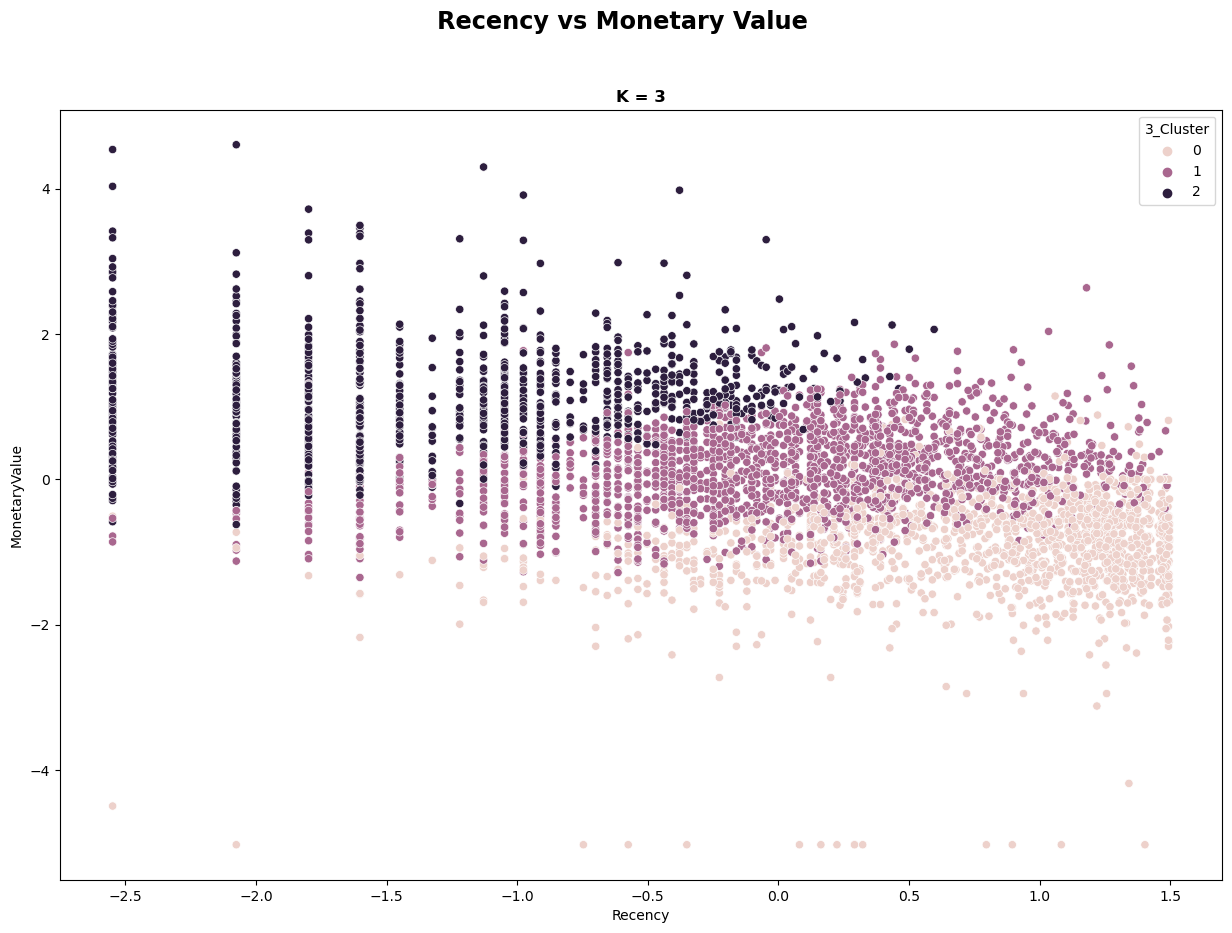

In [135]:
fig, ax = plt.subplots(figsize=(15, 10))

fig.suptitle('Recency vs Monetary Value', fontweight='heavy', size='xx-large')

sns.scatterplot(ax=ax, x='Recency', y='MonetaryValue', hue='3_Cluster', data=rfm_metric_scaled )


ax.set_title('K = 3',fontweight='bold')


plt.show()

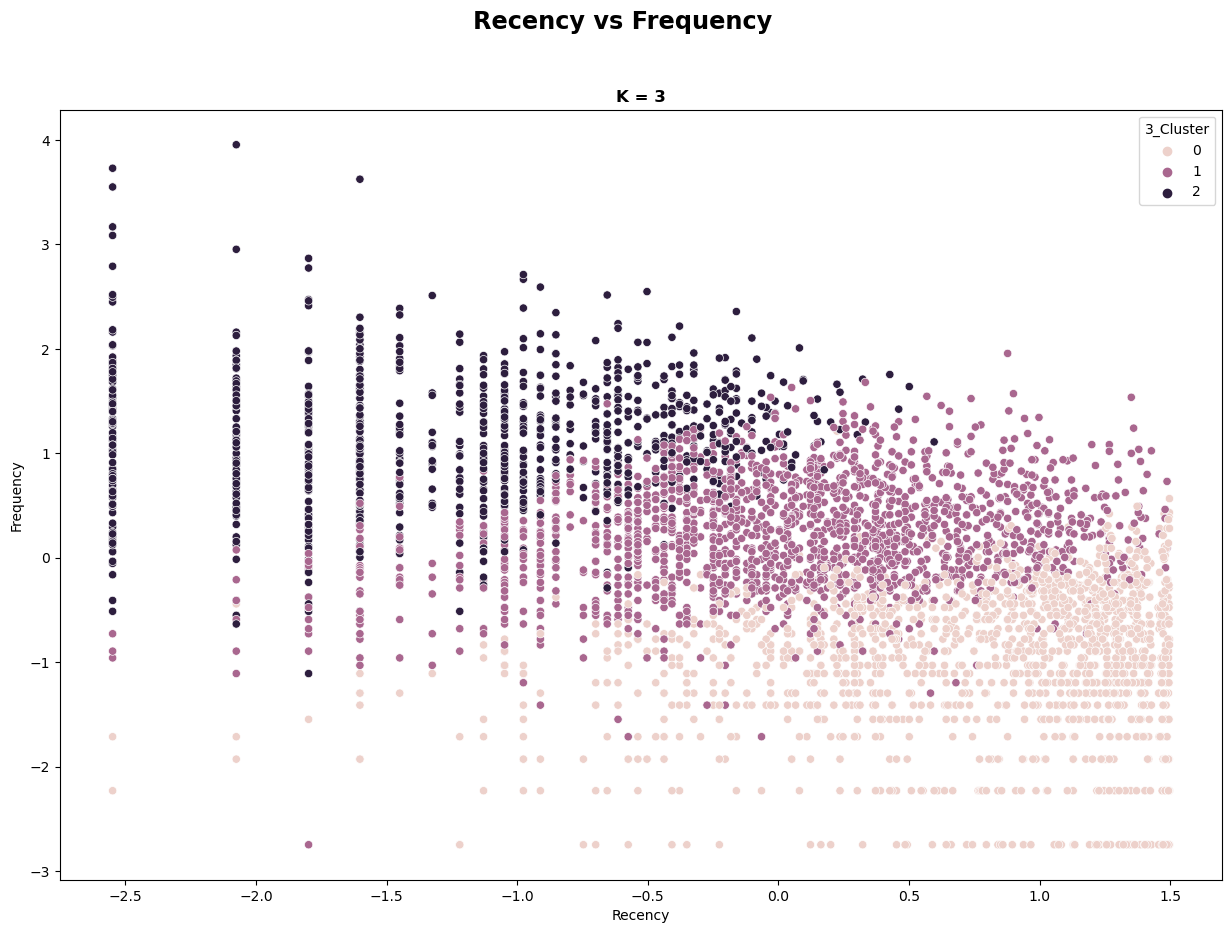

In [136]:
fig, ax = plt.subplots( figsize=(15, 10))

fig.suptitle('Recency vs Frequency', fontweight='heavy', size='xx-large')

sns.scatterplot(ax=ax, x='Recency', y='Frequency', hue='3_Cluster', data=rfm_metric_scaled )

ax.set_title('K = 3',fontweight='bold')


plt.show()

In [137]:
rfm_metric_k3.groupby(['Cluster']).agg({'Recency': 'mean', 'Frequency':'mean', 'MonetaryValue':['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         173.0      15.0         264.0  1532
1          67.0      67.0        1059.0  1857
2          12.0     264.0        6029.0   983

## Evaluation

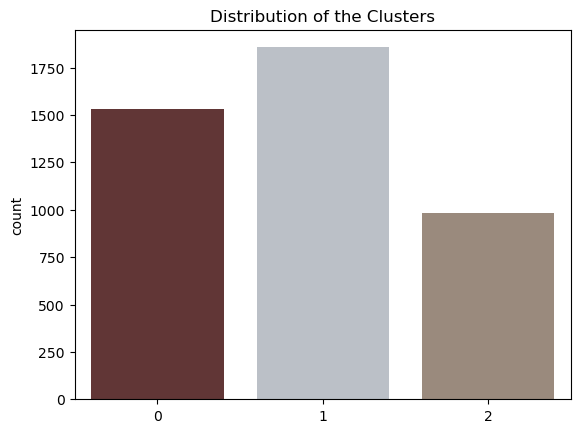

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
pl = sns.countplot(x=cluster_labels, palette=pal)
pl.set_title("Distribution of the Clusters")
plt.show()


### The clusters seem to be fairly distributed.

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model.